In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [3]:
start_year = 2014
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [4]:
n_days = 10

In [8]:
code_dat.loc[:, 'hl_range']  = code_dat.loc[:, 'High'] - code_dat.loc[:, 'Low']
code_dat.loc[:, 'typical_price'] = (code_dat.loc[:, 'High'] + code_dat.loc[:, 'Low'] + code_dat.loc[:, 'Close']) / 3

In [9]:
rolling_sma = code_dat.rolling(window=n_days)

In [10]:
centre = rolling_sma['typical_price'].mean()

In [11]:
hl_range = rolling_sma['hl_range'].mean()

In [14]:
up_band = centre + hl_range
down_band = centre - hl_range

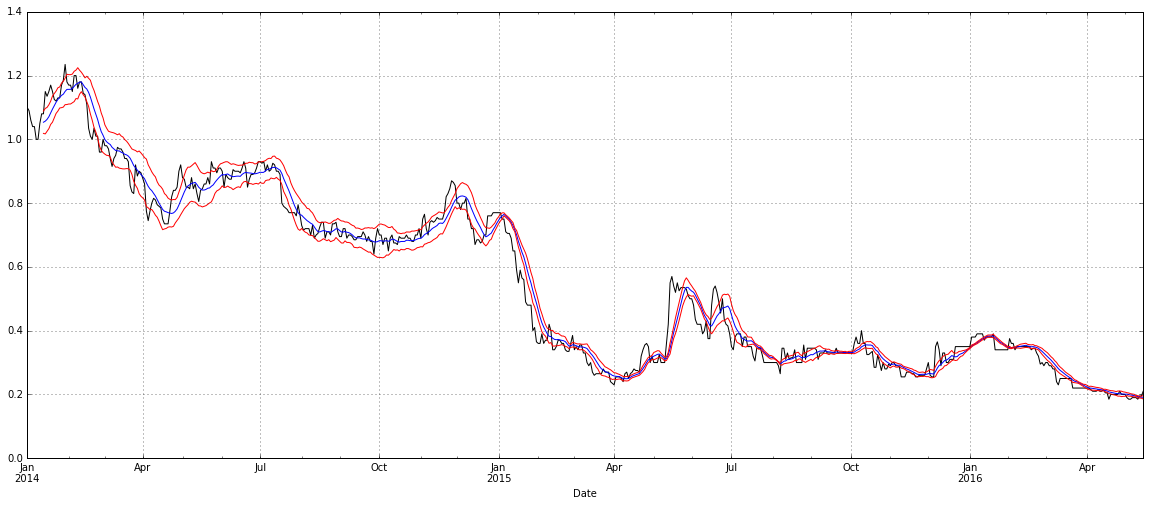

In [15]:
plt.figure(figsize=(20, 8))
ax = plt.subplot(111)
code_dat.loc[:, 'Close'].plot(ax=ax, color='k')
centre.plot(ax=ax, color='b')
up_band.plot(ax=ax, color='r')
down_band.plot(ax=ax, color='r')
plt.grid()